In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, cheby1, filtfilt

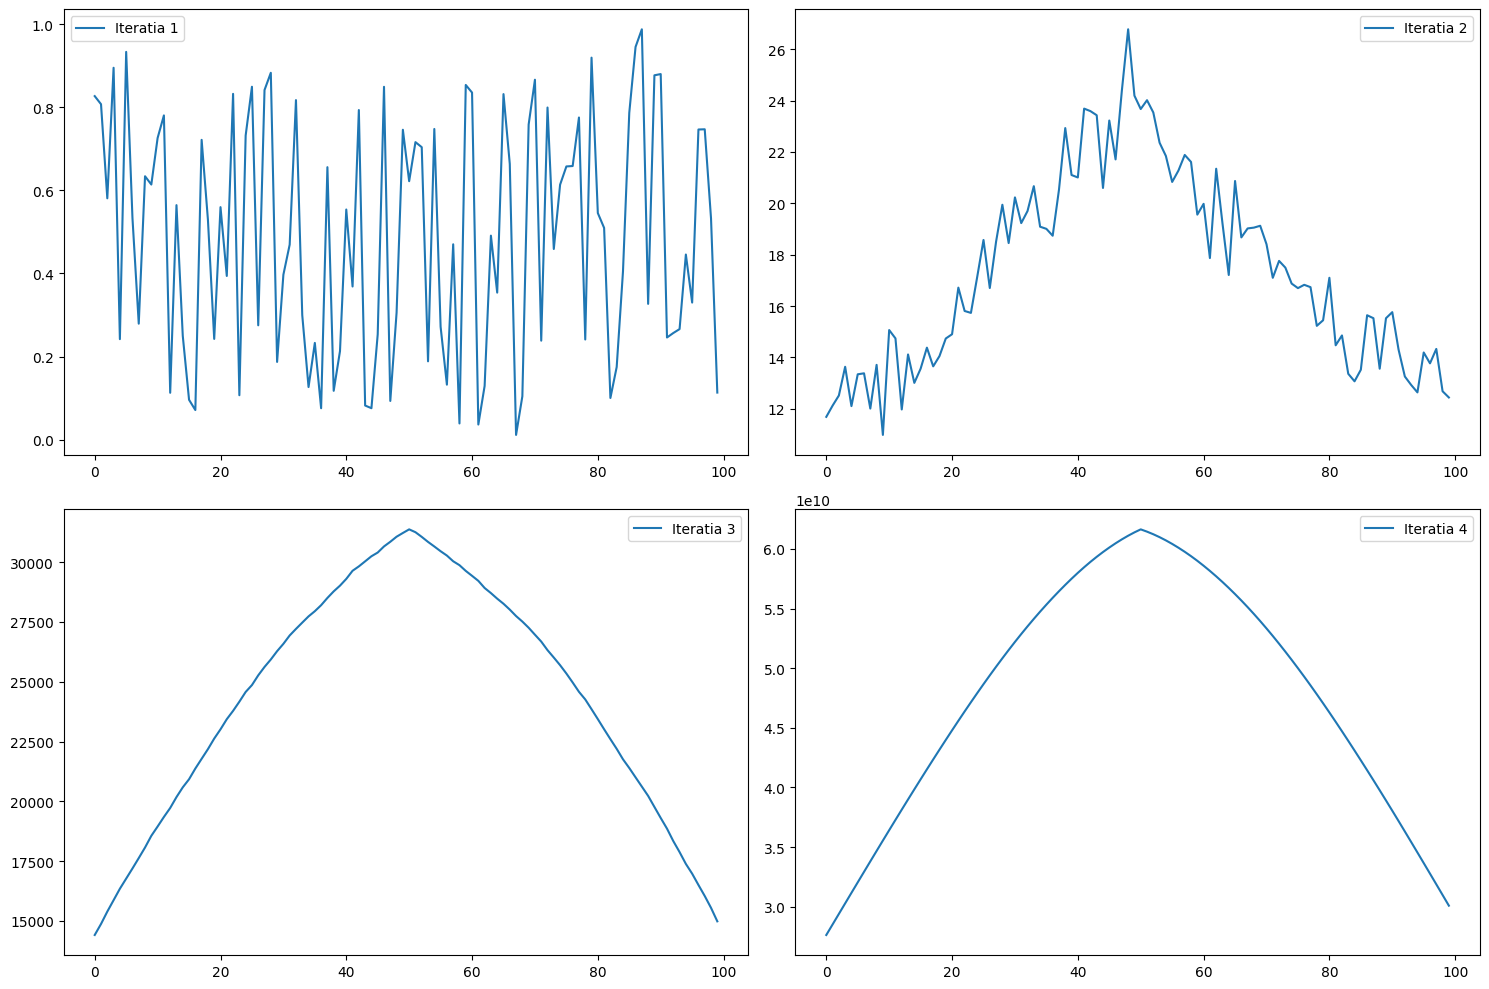

In [15]:
x = np.random.rand(100)

plt.figure(figsize=(15, 10))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(x, label=f'Iteratia {i+1}')
    plt.legend()
    x = np.convolve(x, x, mode='same')

plt.tight_layout()
plt.show()

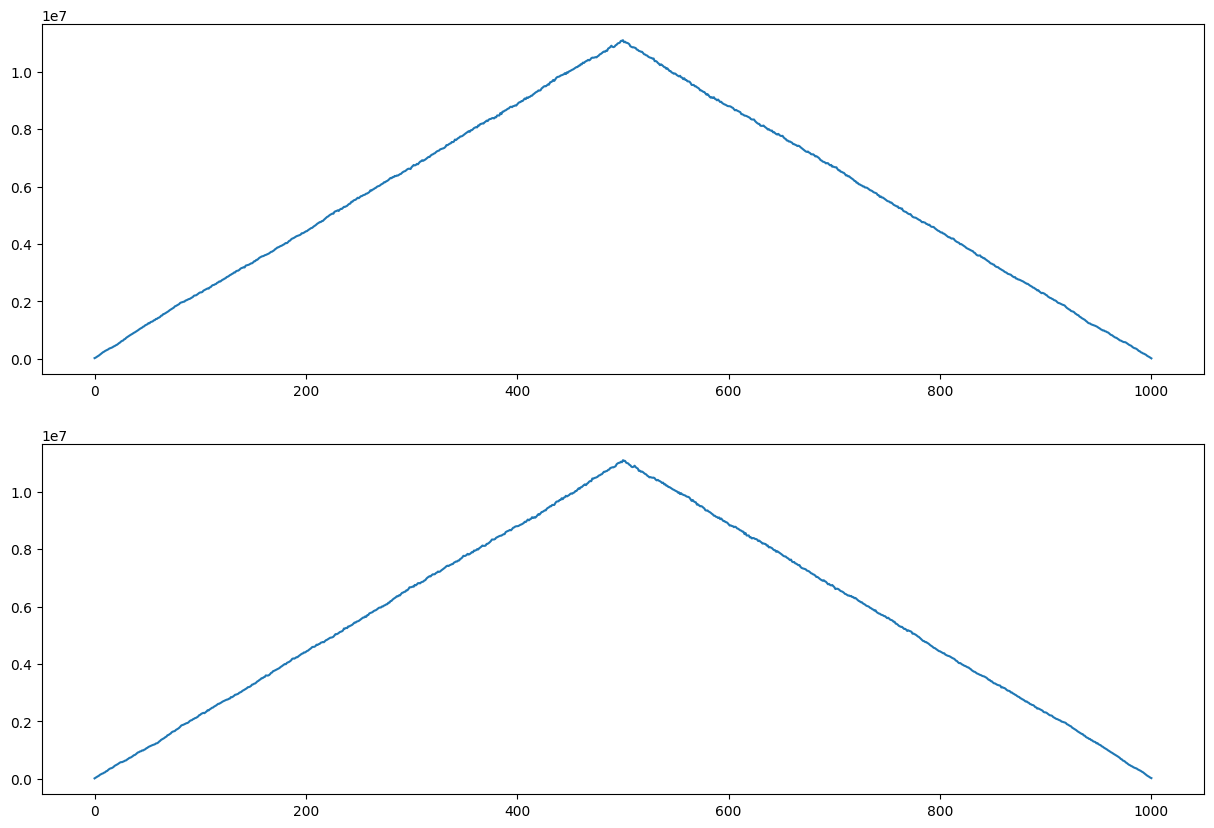

In [57]:
N = 500

polynom1 = np.poly1d(np.random.randint(100, 201, N + 1)) 
polynom2 = np.poly1d(np.random.randint(100, 201, N + 1))  

product = np.polymul(polynom1, polynom2)

fft_poly1 = np.fft.fft(polynom1.coefficients, n = len(polynom1.coefficients)*2 - 1)
fft_poly2 = np.fft.fft(polynom2.coefficients, n = len(polynom1.coefficients)*2 - 1)

product_fft = np.fft.ifft(fft_poly1 * fft_poly2).real.round().astype(int)

product_fft_poly = np.poly1d(product_fft)

product, product_fft_poly

fig, axs = plt.subplots(2, 1, figsize=(15, 10))

axs[0].plot(product)
axs[1].plot(product_fft_poly)

In [58]:
def rectangular_window(N):
    return np.ones(N)

In [59]:
def hanning_window(N):
    return 0.5 * (1 - np.cos(2 * np.pi * np.arange(N) / N))

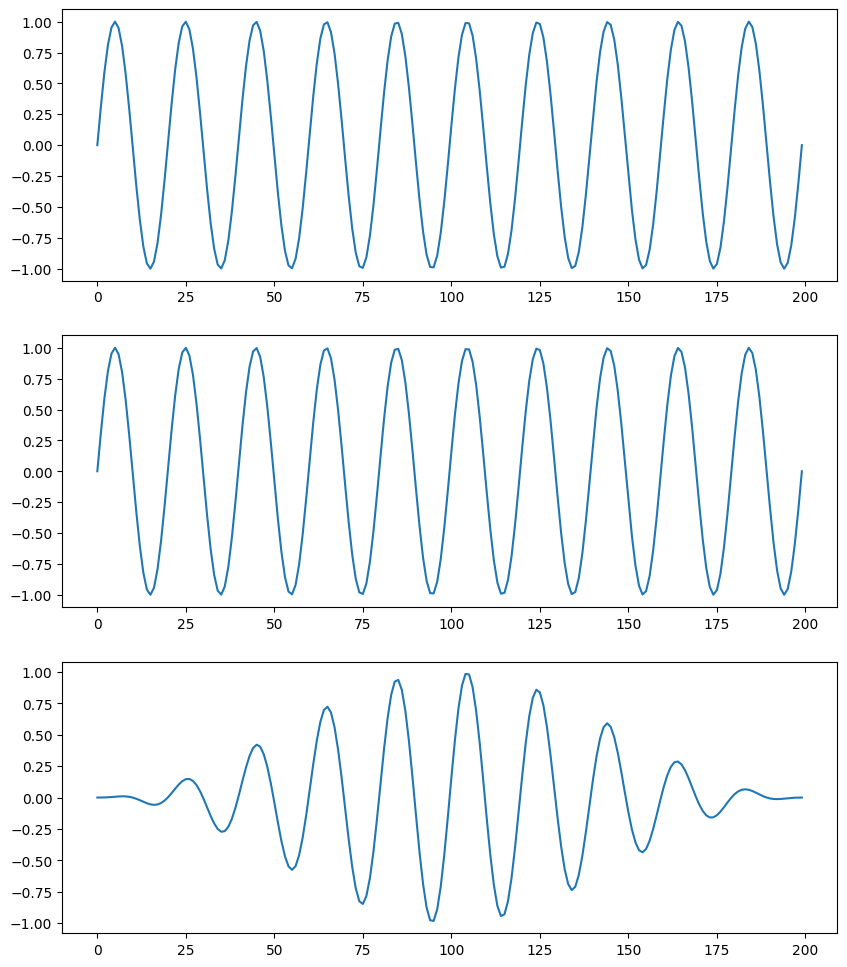

In [60]:
N = 200

t = np.linspace(0, 0.1, N)
sin = np.sin(2 * np.pi * 100 * t)

rect_window_sin = sin * rectangular_window(N)
hanning_window_sin = sin * hanning_window(N)

fig, axs = plt.subplots(3, 1, figsize=(10, 12))

axs[0].plot(sin)
axs[1].plot(rect_window_sin)
axs[2].plot(hanning_window_sin)

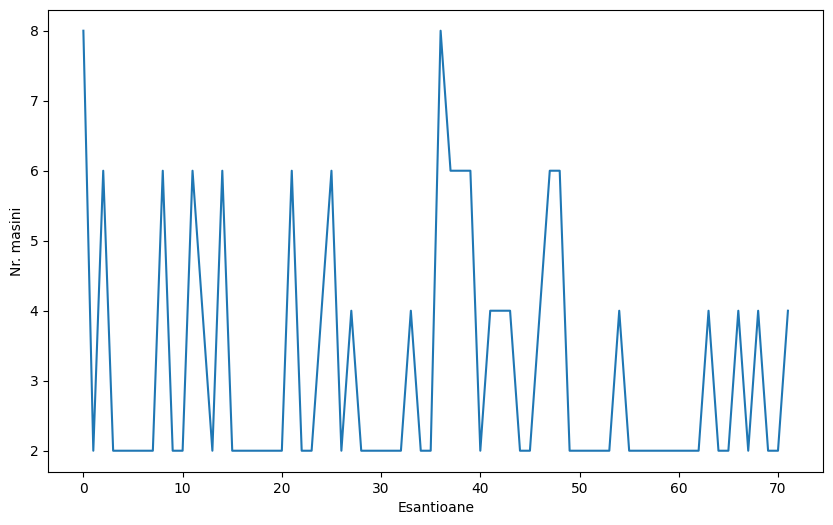

In [47]:
data = np.genfromtxt('Train.csv', delimiter=',', skip_header=1)
car_counts = data[:72, -1]

time_hours = np.arange(car_counts.size)
time_hours

plt.figure(figsize=(10, 6))
plt.plot(time_hours, car_counts)
plt.xlabel('Esantioane')
plt.ylabel('Nr. masini')
plt.show()

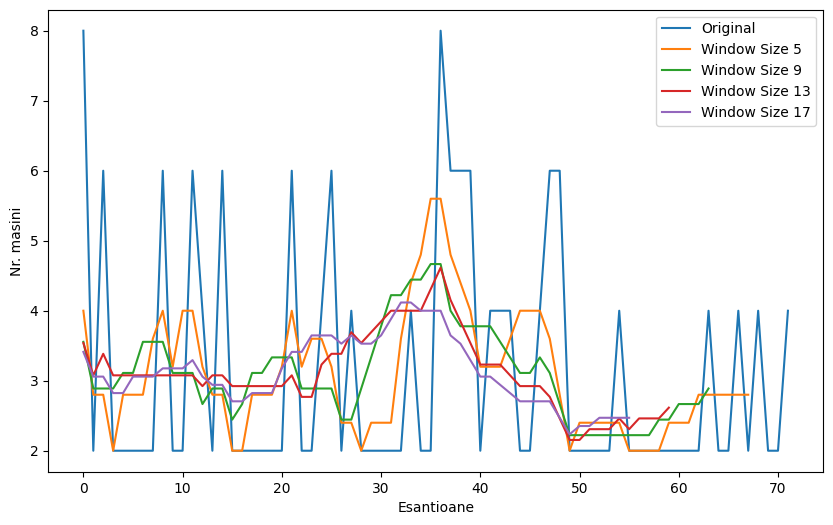

In [60]:
window_sizes = [5, 9, 13, 17]

smoothed_signals = {}
for w in window_sizes:
    smoothed_signal = np.convolve(x, np.ones(w), 'valid') / w
    smoothed_signals[w] = smoothed_signal

plt.figure(figsize=(10, 6))

plt.plot(time_hours, car_counts, label='Original')

for w, smoothed_signal in smoothed_signals.items():
    # Adjust the length of the time array to match the smoothed signal
    adjusted_time_hours = time_hours[:len(smoothed_signal)]
    plt.plot(adjusted_time_hours, smoothed_signal, label=f'Window Size {w}')

plt.xlabel('Esantioane')
plt.ylabel('Nr. masini')
plt.legend()
plt.show()


In [64]:
sampling_frequency_hz = 1 / 3600 

cutoff_frequency_hz = 1 / (6 * 3600)  

nyquist_frequency_hz = sampling_frequency_hz / 2

normalized_cutoff_frequency = cutoff_frequency_hz / nyquist_frequency_hz

cutoff_frequency_hz, normalized_cutoff_frequency

(4.6296296296296294e-05, 0.3333333333333333)

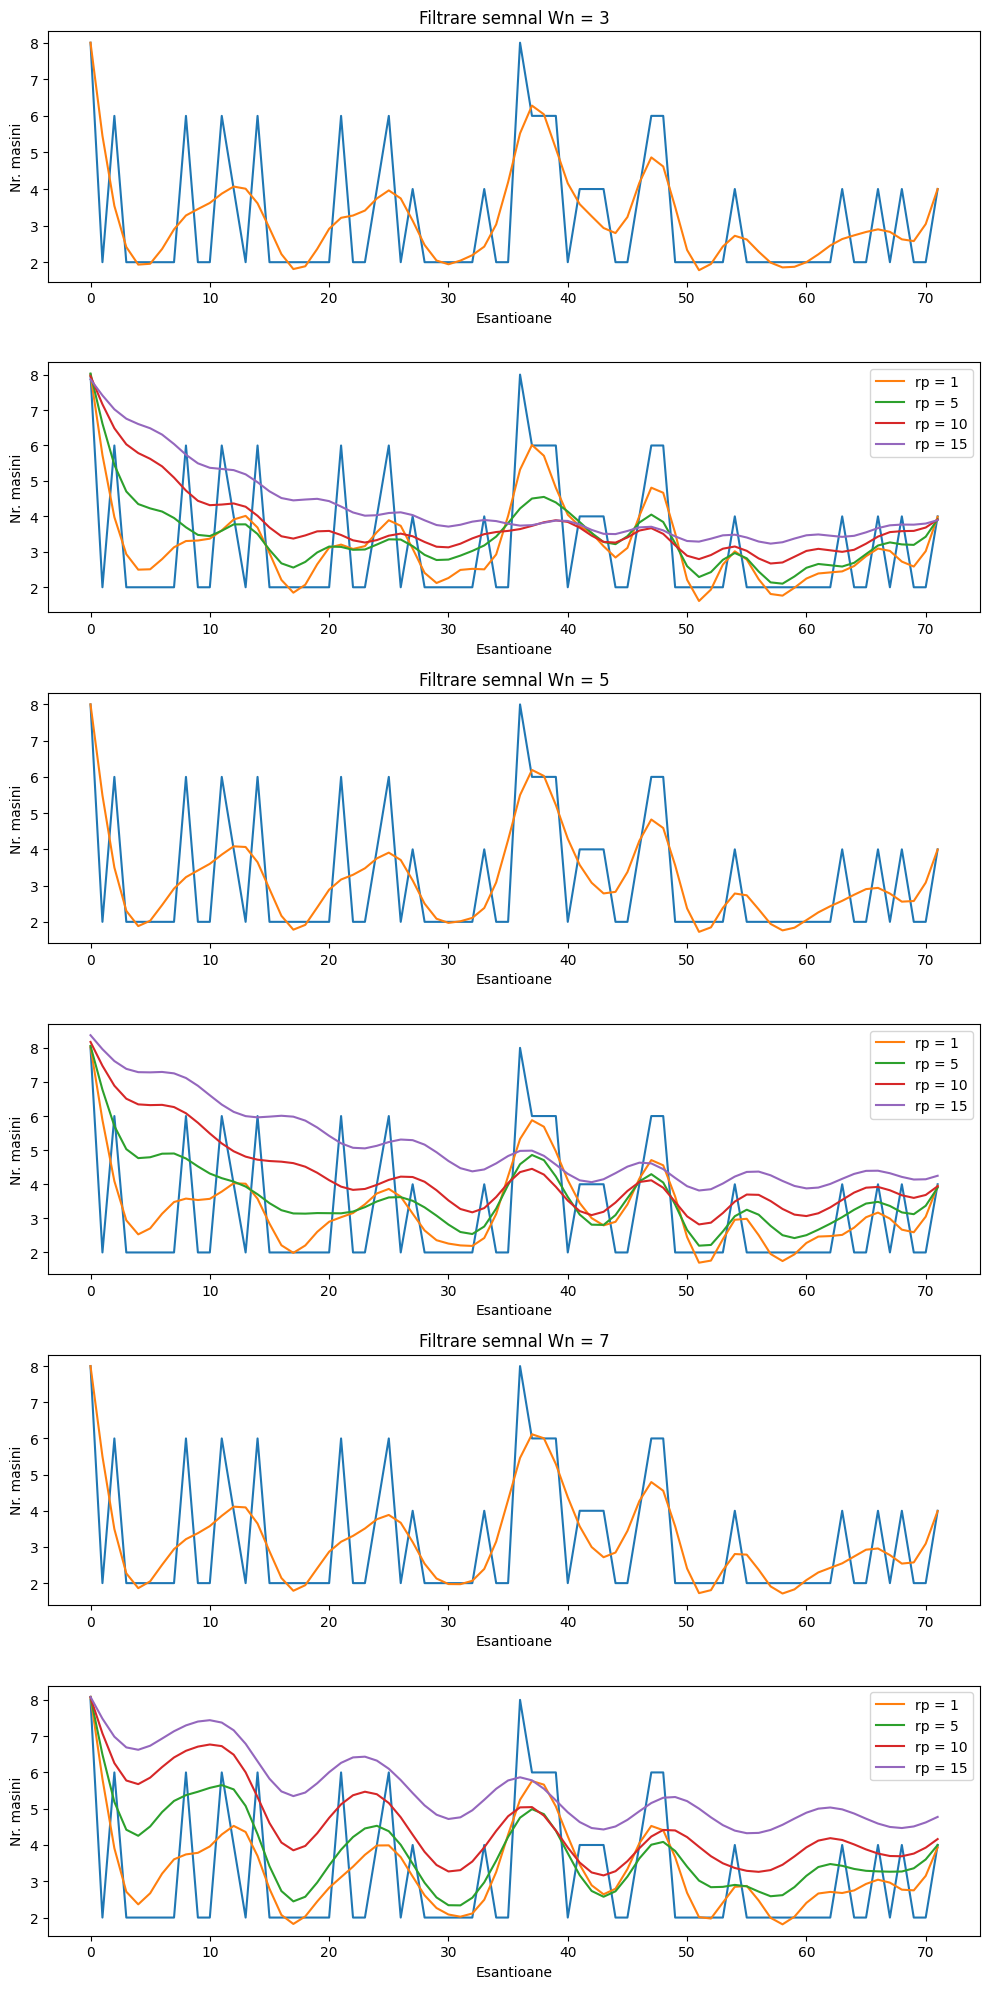

In [88]:
N = [3,5,7]

# Normalized cutoff frequency (previously calculated)
Wn = normalized_cutoff_frequency

rps = [1, 5, 10, 15]

fig, axs = plt.subplots(6, 1, figsize=(10, 20))

for i,n in enumerate(N):
    b_butter, a_butter = butter(n, Wn, btype='low', analog=False)
    filtered_signal_butter = filtfilt(b_butter, a_butter, car_counts)
    axs[i * 2].plot(car_counts, label='Semanl brut')
    axs[i * 2].plot(filtered_signal_butter)
    axs[i * 2].set_xlabel('Esantioane')
    axs[i * 2].set_ylabel('Nr. masini')
    axs[i * 2].set_title(f'Filtrare semnal Wn = {n}')

    axs[i * 2 + 1].plot(car_counts)
    for rp in rps:
        b_cheby, a_cheby = cheby1(n, rp, Wn, btype='low', analog=False)
        filtered_signal_cheby = filtfilt(b_cheby, a_cheby, car_counts)
        axs[i * 2 + 1].plot(filtered_signal_cheby, label=f'rp = {rp}')
        
    axs[i * 2 + 1].set_xlabel('Esantioane')
    axs[i * 2 + 1].set_ylabel('Nr. masini')
    axs[i * 2 + 1].legend()

    
plt.tight_layout()
plt.show()